# Famous Italian solitaire simulation and statistics using Python

In [105]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import math 
import seaborn as sns
import pandas as pd
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

# The game

In [100]:
PICK=[1,2,3]*13+[1]
COUNTER=[]
#repeat the game for 10^5 times
for j in range(100000):
    mazzo=np.repeat([1],4).tolist()+np.repeat([2],4).tolist()+np.repeat([3],4).tolist()
    mazzo=mazzo+np.repeat(['non ril'],28).tolist()
    CARTE=[]
    for p in PICK:
        carta=random.sample(mazzo,1)
        CARTE.append(carta[0])
        mazzo.remove(carta[0])
        if p==carta[0]:
            COUNTER.append(1)
            break



In [126]:
P_Winning=1-sum(COUNTER)/100000
P_Loosing=sum(COUNTER)/100000

In [127]:
print('Probability of winning: \n')
print('%.4f \n' %(P_Winning))
print('Probability of loosing: \n')
print('%.4f \n' %(P_Loosing))

Probability of winning: 

0.0085 

Probability of loosing: 

0.9915 



In [115]:
game=pd.DataFrame()
game['No mistake allowed']=[sum(COUNTER),100000-sum(COUNTER)]
game.index=['Lost','Win']

<AxesSubplot:ylabel='No mistake allowed'>

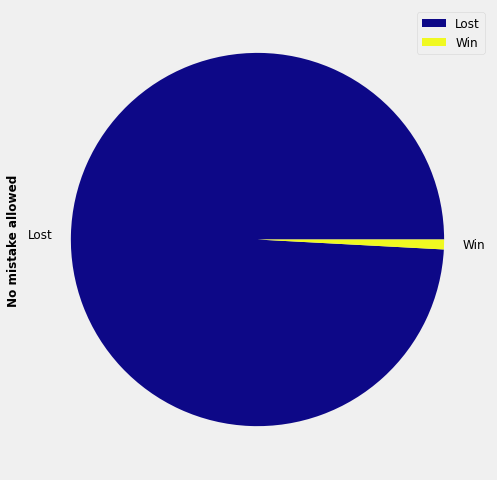

In [118]:
game.plot.pie(y='No mistake allowed',cmap='plasma')

# More gentle versions: 
## One mistake allowed

In [128]:
PICK=[1,2,3]*13+[1]
COUNTER=[]
for j in range(100000):
    c=0
    mazzo=np.repeat([1],4).tolist()+np.repeat([2],4).tolist()+np.repeat([3],4).tolist()
    mazzo=mazzo+np.repeat(['non ril'],28).tolist()
    #COUNTER=0
    for p in PICK:
        carta=random.sample(mazzo,1)
        mazzo.remove(carta[0])
        if p==carta[0]:
            
            c=c+1
            if c>1:
            #print('Hai perso')
                COUNTER.append(1)
                break
    #MAX_COUNTER.append(COUNTER)



In [129]:
P_Winning=1-sum(COUNTER)/100000
P_Loosing=sum(COUNTER)/100000

In [130]:
print('Probability of winning: \n')
print('%.4f \n' %(P_Winning))
print('Probability of loosing: \n')
print('%.4f \n' %(P_Loosing))

Probability of winning: 

0.0567 

Probability of loosing: 

0.9433 



In [131]:
game['One Mistake Allowed']=[sum(COUNTER),100000-sum(COUNTER)]

array([<AxesSubplot:ylabel='No mistake allowed'>,
       <AxesSubplot:ylabel='One Mistake Allowed'>], dtype=object)

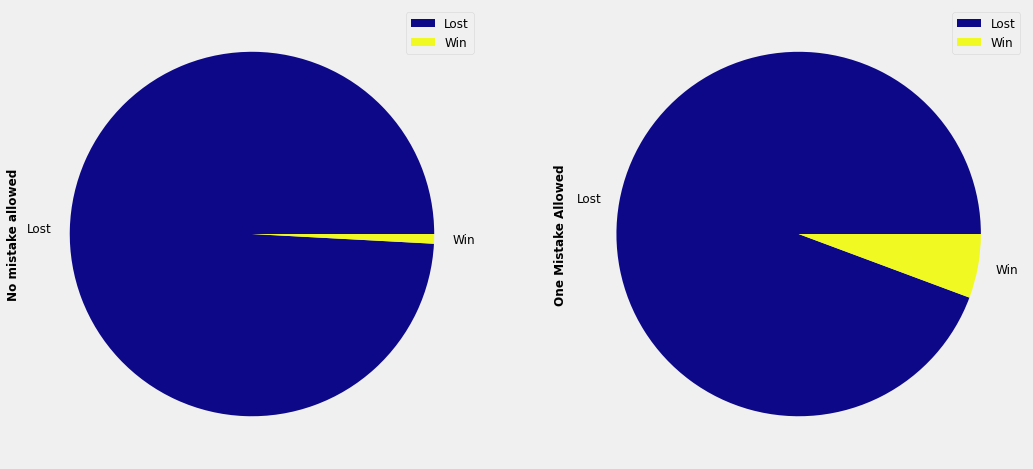

In [133]:
game.plot.pie(subplots=True,cmap='plasma')

# Two mistakes allowed

In [134]:
PICK=[1,2,3]*13+[1]
COUNTER=[]
for j in range(100000):
    c=0
    mazzo=np.repeat([1],4).tolist()+np.repeat([2],4).tolist()+np.repeat([3],4).tolist()
    mazzo=mazzo+np.repeat(['non ril'],28).tolist()
    #COUNTER=0
    for p in PICK:
        carta=random.sample(mazzo,1)
        mazzo.remove(carta[0])
        if p==carta[0]:
            
            c=c+1
            if c>2:
            #print('Hai perso')
                COUNTER.append(1)
                break
    #MAX_COUNTER.append(COUNTER)



In [135]:
P_Winning=1-sum(COUNTER)/100000
P_Loosing=sum(COUNTER)/100000

In [136]:
print('Probability of winning: \n')
print('%.4f \n' %(P_Winning))
print('Probability of loosing: \n')
print('%.4f \n' %(P_Loosing))

Probability of winning: 

0.1834 

Probability of loosing: 

0.8166 



In [137]:
game['Two Mistakes Allowed']=[sum(COUNTER),100000-sum(COUNTER)]


array([<AxesSubplot:ylabel='No mistake allowed'>,
       <AxesSubplot:ylabel='One Mistake Allowed'>,
       <AxesSubplot:ylabel='Two Mistakes Allowed'>], dtype=object)

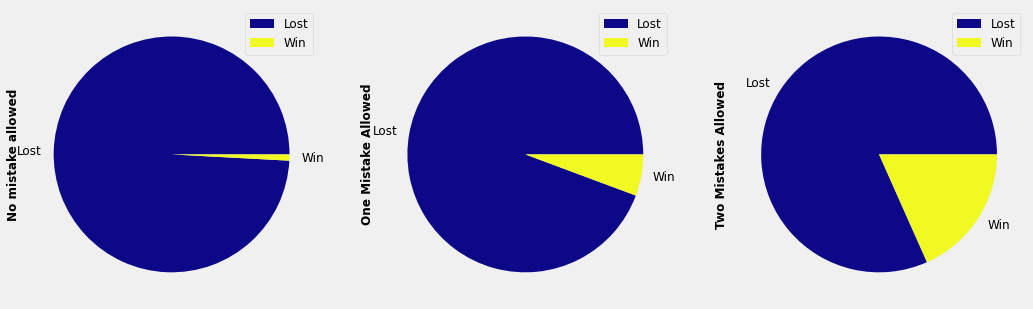

In [138]:
game.plot.pie(subplots=True,cmap='plasma')

# How many mistakes do you usually do?

In [240]:
PICK=[1,2,3]*13+[1]
COUNTER=[]
for j in range(100000):
    c=0
    mazzo=np.repeat([1],4).tolist()+np.repeat([2],4).tolist()+np.repeat([3],4).tolist()
    mazzo=mazzo+np.repeat(['non ril'],28).tolist()
    for p in PICK:
        carta=random.sample(mazzo,1)
        mazzo.remove(carta[0])
        if p==carta[0]:
            c=c+1
    COUNTER.append(c)

<AxesSubplot:xlabel='Number of errors', ylabel='Frequency'>

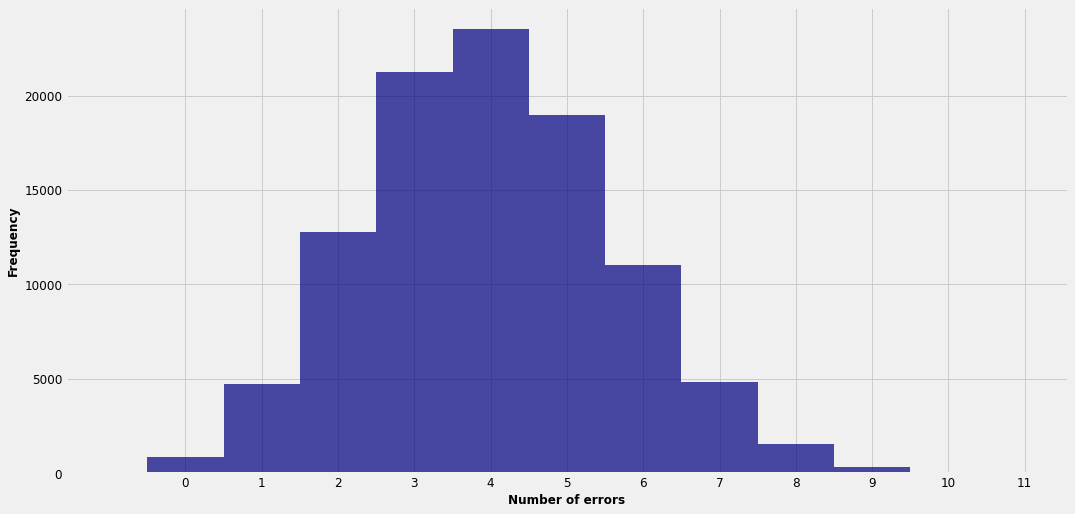

In [241]:
plt.hist(COUNTER,bins=np.arange(0,12,1),alpha=0.7, rwidth=1,color='navy')
plt.grid(True)
plt.xlabel('Number of errors')
plt.ylabel('Frequency')
plt.xticks(np.arange(0.5,12.5,1),np.arange(0,12,1))
sns.kdeplot(np.array(COUNTER))

In [243]:
from scipy import stats
x = COUNTER
stats.normaltest(x)

NormaltestResult(statistic=802.8078828087745, pvalue=4.704172446976543e-175)

# About Bayes Formula

## Computing the probability of winning after passing the first 10 cards

In [191]:
PICK=[1,2,3]*13+[1]
COUNTER=[]
#repeat the game for 10^5 times
for j in range(100000):
    mazzo=np.repeat([1],4).tolist()+np.repeat([2],4).tolist()+np.repeat([3],4).tolist()
    mazzo=mazzo+np.repeat(['non ril'],28).tolist()
    CARTE=[]
    for p in PICK:
        carta=random.sample(mazzo,1)
        CARTE.append(carta[0])
        mazzo.remove(carta[0])
        if p==carta[0]:
            COUNTER.append(1)
            break


P_Winning=1-sum(COUNTER)/100000
P_Loosing=sum(COUNTER)/100000

In [184]:
PICK=[1,2,3]*13+[1]
COUNTER=[]
#repeat the game for 10^5 times
for j in range(100000):
    mazzo=np.repeat([1],4).tolist()+np.repeat([2],4).tolist()+np.repeat([3],4).tolist()
    mazzo=mazzo+np.repeat(['non ril'],28).tolist()
    CARTE=[]
    for p in range(10):
        carta=random.sample(mazzo,1)
        CARTE.append(carta[0])
        mazzo.remove(carta[0])
        if PICK[p]==carta[0]:
            COUNTER.append(1)
            break

In [189]:
P_loosing_10=sum(COUNTER)/100000
P_Winning_10=1-P_loosing_10

In [197]:
P_after_10=P_Winning/P_Winning_10

In [207]:
print('The probability of winning, knowing that you survived the first 10 cards is the following: \n')
print('%.3f' %(P_after_10))

The probability of winning, knowing that you survived the first 10 cards is the following: 

0.024


## Computing the probability of winning after "surviving" the first 20 cards

In [198]:
PICK=[1,2,3]*13+[1]
COUNTER=[]
#repeat the game for 10^5 times
for j in range(100000):
    mazzo=np.repeat([1],4).tolist()+np.repeat([2],4).tolist()+np.repeat([3],4).tolist()
    mazzo=mazzo+np.repeat(['non ril'],28).tolist()
    CARTE=[]
    for p in range(20):
        carta=random.sample(mazzo,1)
        CARTE.append(carta[0])
        mazzo.remove(carta[0])
        if PICK[p]==carta[0]:
            COUNTER.append(1)
            break

In [199]:
P_loosing_20=sum(COUNTER)/100000
P_Winning_20=1-P_loosing_20

In [200]:
P_after_20=P_Winning/P_Winning_20

In [201]:
P_after_20

0.07577157641840682

In [221]:
print('The probability of winning, knowing that you survived the first 20 cards is the following: \n')
print('%.3f' %(P_after_20))

The probability of winning, knowing that you survived the first 20 cards is the following: 

0.076


## Computing the probability of winning after "surviving" the first 30 cards

In [203]:
PICK=[1,2,3]*13+[1]
COUNTER=[]
#repeat the game for 10^5 times
for j in range(100000):
    mazzo=np.repeat([1],4).tolist()+np.repeat([2],4).tolist()+np.repeat([3],4).tolist()
    mazzo=mazzo+np.repeat(['non ril'],28).tolist()
    CARTE=[]
    for p in range(30):
        carta=random.sample(mazzo,1)
        CARTE.append(carta[0])
        mazzo.remove(carta[0])
        if PICK[p]==carta[0]:
            COUNTER.append(1)
            break

In [204]:
P_loosing_30=sum(COUNTER)/100000
P_Winning_30=1-P_loosing_30

In [205]:
P_after_30=P_Winning/P_Winning_30

In [206]:
P_after_30

0.26434558349451875

In [222]:
print('The probability of winning, knowing that you survived the first 30 cards is the following: \n')
print('%.3f' %(P_after_30))

The probability of winning, knowing that you survived the first 30 cards is the following: 

0.264


## Computing the probability of winning after surviving N cards 

In [214]:
J=np.arange(31,40)

In [223]:
PICK=[1,2,3]*13+[1]
MAX_COUNTER=[]
#repeat the game for 10^5 times
for q in J:
    COUNTER=[]
    for j in range(100000):
        mazzo=np.repeat([1],4).tolist()+np.repeat([2],4).tolist()+np.repeat([3],4).tolist()
        mazzo=mazzo+np.repeat(['non ril'],28).tolist()
        CARTE=[]
        for p in range(q):
            carta=random.sample(mazzo,1)
            CARTE.append(carta[0])
            mazzo.remove(carta[0])
            if PICK[p]==carta[0]:
                COUNTER.append(1)
                break
    MAX_COUNTER.append(sum(COUNTER))

In [225]:
P_STAT=[]
for v in MAX_COUNTER:
    p_loose=v/100000
    p_winning=1-p_loose
    p_stat=P_Winning/p_winning
    P_STAT.append(p_stat)

In [227]:
P_STAT=[P_after_10,P_after_20,P_after_30]+P_STAT

In [230]:
n=[10,20,30]+J.tolist()

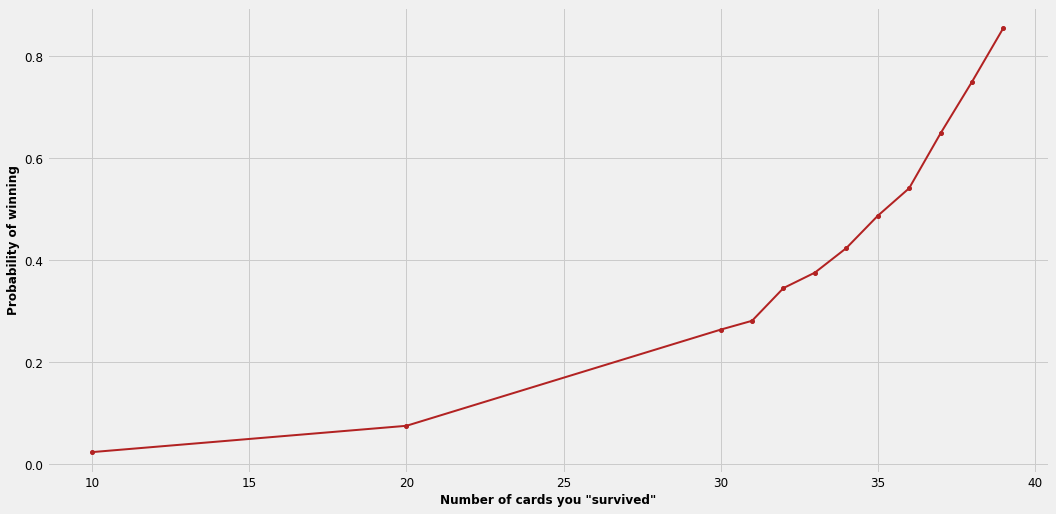

In [239]:
plt.plot(n,P_STAT,marker='.',color='firebrick')
plt.xlabel('Number of cards you "survived"')
plt.ylabel('Probability of winning')
plt.grid()